## Analysing relations between generated features (Sentinel-1) and height-data (Gedi): Scatterplots

### Preparing the data for plotting

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import geopandas as gpd

In [2]:
# Read copy of generated feature-file
df = pd.read_csv('features_copy.csv') 

In [3]:
# was hiervon braucht es noch oder kann das raus und die Funktion ausgelagert werden, weil vorher alles schon passiert??

# Subsetting (leaf-off-period and research area) the Gedi-data
filename = "20230125T1201__L2A__subset_saldi_06(1).gpkg"
gdf = gpd.read_file(filename)

def leaf_off_subset(gdf):
    gdf['Acquisition Time'] = pd.to_datetime(gdf['Acquisition Time'])
    gdf = gdf.loc[(gdf["Acquisition Time"].dt.month >= 6) & (gdf["Acquisition Time"].dt.month <= 9), :]
    return gdf

gdf_lo = leaf_off_subset(gdf=gdf)

# Read GeoJSON-file as a GeoPandas-dataframe
clip_area = gpd.read_file('geo419b_aoi.geojson')

# Clipping the research area
gdf_lo = gpd.clip(gdf_lo, clip_area)

In [4]:
# Adding the absolute height data to the dataframe
df['height (cm)'] = gdf_lo['Relative Height bin98 (cm)'].reset_index(drop=True)
df

,min_vv,max_vv,mean_vv,median_vv,std_vv,05_vv,25_vv,75_vv,95_vv,min_vh,...,mean_rvi,median_rvi,std_rvi,05_rvi,25_rvi,75_rvi,95_rvi,Acquisition Time,Relative Height bin98 (cm),height (cm)
0,0.029655,0.059328,0.044970,0.046899,0.009040,0.032193,0.039151,0.050303,0.056813,0.006371,...,0.676656,0.600958,0.258302,0.422554,0.536758,0.721173,1.111751,2020-08-23 12:53:42,3 - 6 m,367.0
1,0.038104,0.071502,0.055315,0.054353,0.009468,0.041948,0.052576,0.059046,0.068714,0.004549,...,0.529685,0.534081,0.157914,0.302961,0.420416,0.660765,0.725187,2020-08-23 12:53:42,<3 m,284.0
2,0.034223,0.054973,0.047080,0.050770,0.008278,0.034575,0.040628,0.054168,0.054741,0.008356,...,0.787898,0.786650,0.150484,0.583732,0.699420,0.879700,0.994118,2020-08-23 12:53:42,<3 m,299.0
3,0.043288,0.090475,0.063751,0.063856,0.014111,0.045874,0.054512,0.069808,0.084659,0.009802,...,0.679501,0.646785,0.171063,0.442673,0.564667,0.859411,0.861974,2020-08-23 12:53:42,<3 m,299.0
4,0.023024,0.046503,0.035872,0.035242,0.006792,0.026050,0.033723,0.039445,0.045019,0.004023,...,0.725447,0.693434,0.196822,0.535375,0.576309,0.783538,1.050500,2020-08-23 12:53:42,3 - 6 m,385.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21224,0.054460,0.100460,0.087838,0.094188,0.015789,0.060601,0.084372,0.098506,0.100117,0.019543,...,0.938948,0.880552,0.224253,0.678572,0.781656,1.085685,1.278407,2019-09-28 23:17:24,6 - 10 m,827.0
21225,0.065006,0.099293,0.085376,0.090597,0.012253,0.066753,0.076681,0.094688,0.098906,0.011059,...,0.758615,0.809306,0.208448,0.442282,0.646127,0.865894,1.021243,2019-09-28 23:17:24,6 - 10 m,651.0
21226,0.081991,0.121187,0.100127,0.094899,0.014419,0.083593,0.088640,0.112766,0.120419,0.015042,...,0.788234,0.843463,0.165804,0.578170,0.626849,0.919048,0.997524,2019-09-28 23:17:24,3 - 6 m,449.0
21227,0.068409,0.100264,0.084457,0.083878,0.010896,0.069835,0.075882,0.093441,0.098261,0.017673,...,0.788931,0.716909,0.134308,0.651166,0.675925,0.891592,0.984590,2019-09-28 23:17:24,3 - 6 m,370.0


In [5]:
# Convert all feature values to dB
df_dB = df.copy()
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'height (cm)':
        df_dB[col + '_dB'] = 10 * np.log10(df[col])
        df_dB.drop(col, axis=1, inplace=True)

df_dB

,Acquisition Time,Relative Height bin98 (cm),height (cm),min_vv_dB,max_vv_dB,mean_vv_dB,median_vv_dB,std_vv_dB,05_vv_dB,25_vv_dB,...,95_vh_dB,min_rvi_dB,max_rvi_dB,mean_rvi_dB,median_rvi_dB,std_rvi_dB,05_rvi_dB,25_rvi_dB,75_rvi_dB,95_rvi_dB
0,2020-08-23 12:53:42,3 - 6 m,367.0,-15.278951,-12.267371,-13.470763,-13.288327,-20.438533,-14.922367,-14.072588,...,-19.065150,-4.112978,0.905702,-1.696322,-2.211558,-5.878719,-3.741180,-2.702214,-1.419603,0.460074
1,2020-08-23 12:53:42,<3 m,284.0,-14.190261,-11.456813,-12.571582,-12.647752,-20.237469,-13.772877,-12.792092,...,-19.395310,-5.644735,-1.315022,-2.759826,-2.723929,-8.015802,-5.186133,-3.763208,-1.799532,-1.395502
2,2020-08-23 12:53:42,<3 m,299.0,-14.656760,-12.598524,-13.271676,-12.943954,-20.820777,-14.612319,-13.911798,...,-18.398652,-2.717744,0.151727,-1.035301,-1.042186,-8.225093,-2.337865,-1.552619,-0.556656,-0.025620
3,2020-08-23 12:53:42,<3 m,299.0,-13.636355,-10.434712,-11.955104,-11.947978,-18.504387,-13.384375,-12.635044,...,-17.151114,-3.985021,-0.644501,-1.678097,-1.892404,-7.668443,-3.539171,-2.482073,-0.657989,-0.645056
4,2020-08-23 12:53:42,3 - 6 m,385.0,-16.378274,-13.325224,-14.452428,-14.529363,-21.679889,-15.841848,-14.720760,...,-18.808935,-2.791322,0.565792,-1.393942,-1.589950,-7.059270,-2.713423,-2.393447,-1.059400,0.213959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21224,2019-09-28 23:17:24,6 - 10 m,827.0,-12.639191,-9.980071,-10.563192,-10.260058,-18.016470,-12.175234,-10.738008,...,-14.649354,-1.819786,1.138474,-0.273585,-0.552452,-6.492625,-1.684040,-1.069842,0.357037,1.066691
21225,2019-09-28 23:17:24,6 - 10 m,651.0,-11.870446,-10.030821,-10.686618,-10.428862,-19.117543,-11.755294,-11.153112,...,-15.931649,-3.969931,0.318460,-1.199786,-0.918874,-6.810028,-3.543003,-1.896820,-0.625354,0.091290
21226,2019-09-28 23:17:24,3 - 6 m,449.0,-10.862351,-9.165436,-9.994494,-10.227392,-18.410743,-10.778276,-10.523700,...,-15.252378,-2.417807,0.040186,-1.033449,-0.739342,-7.804051,-2.379445,-2.028373,-0.366619,-0.010767
21227,2019-09-28 23:17:24,3 - 6 m,370.0,-11.648855,-9.988532,-10.733653,-10.763540,-19.627346,-11.559259,-11.198596,...,-16.361338,-1.876098,0.091785,-1.029607,-1.445358,-8.718991,-1.863085,-1.701012,-0.498339,-0.067446


### Plotting the results

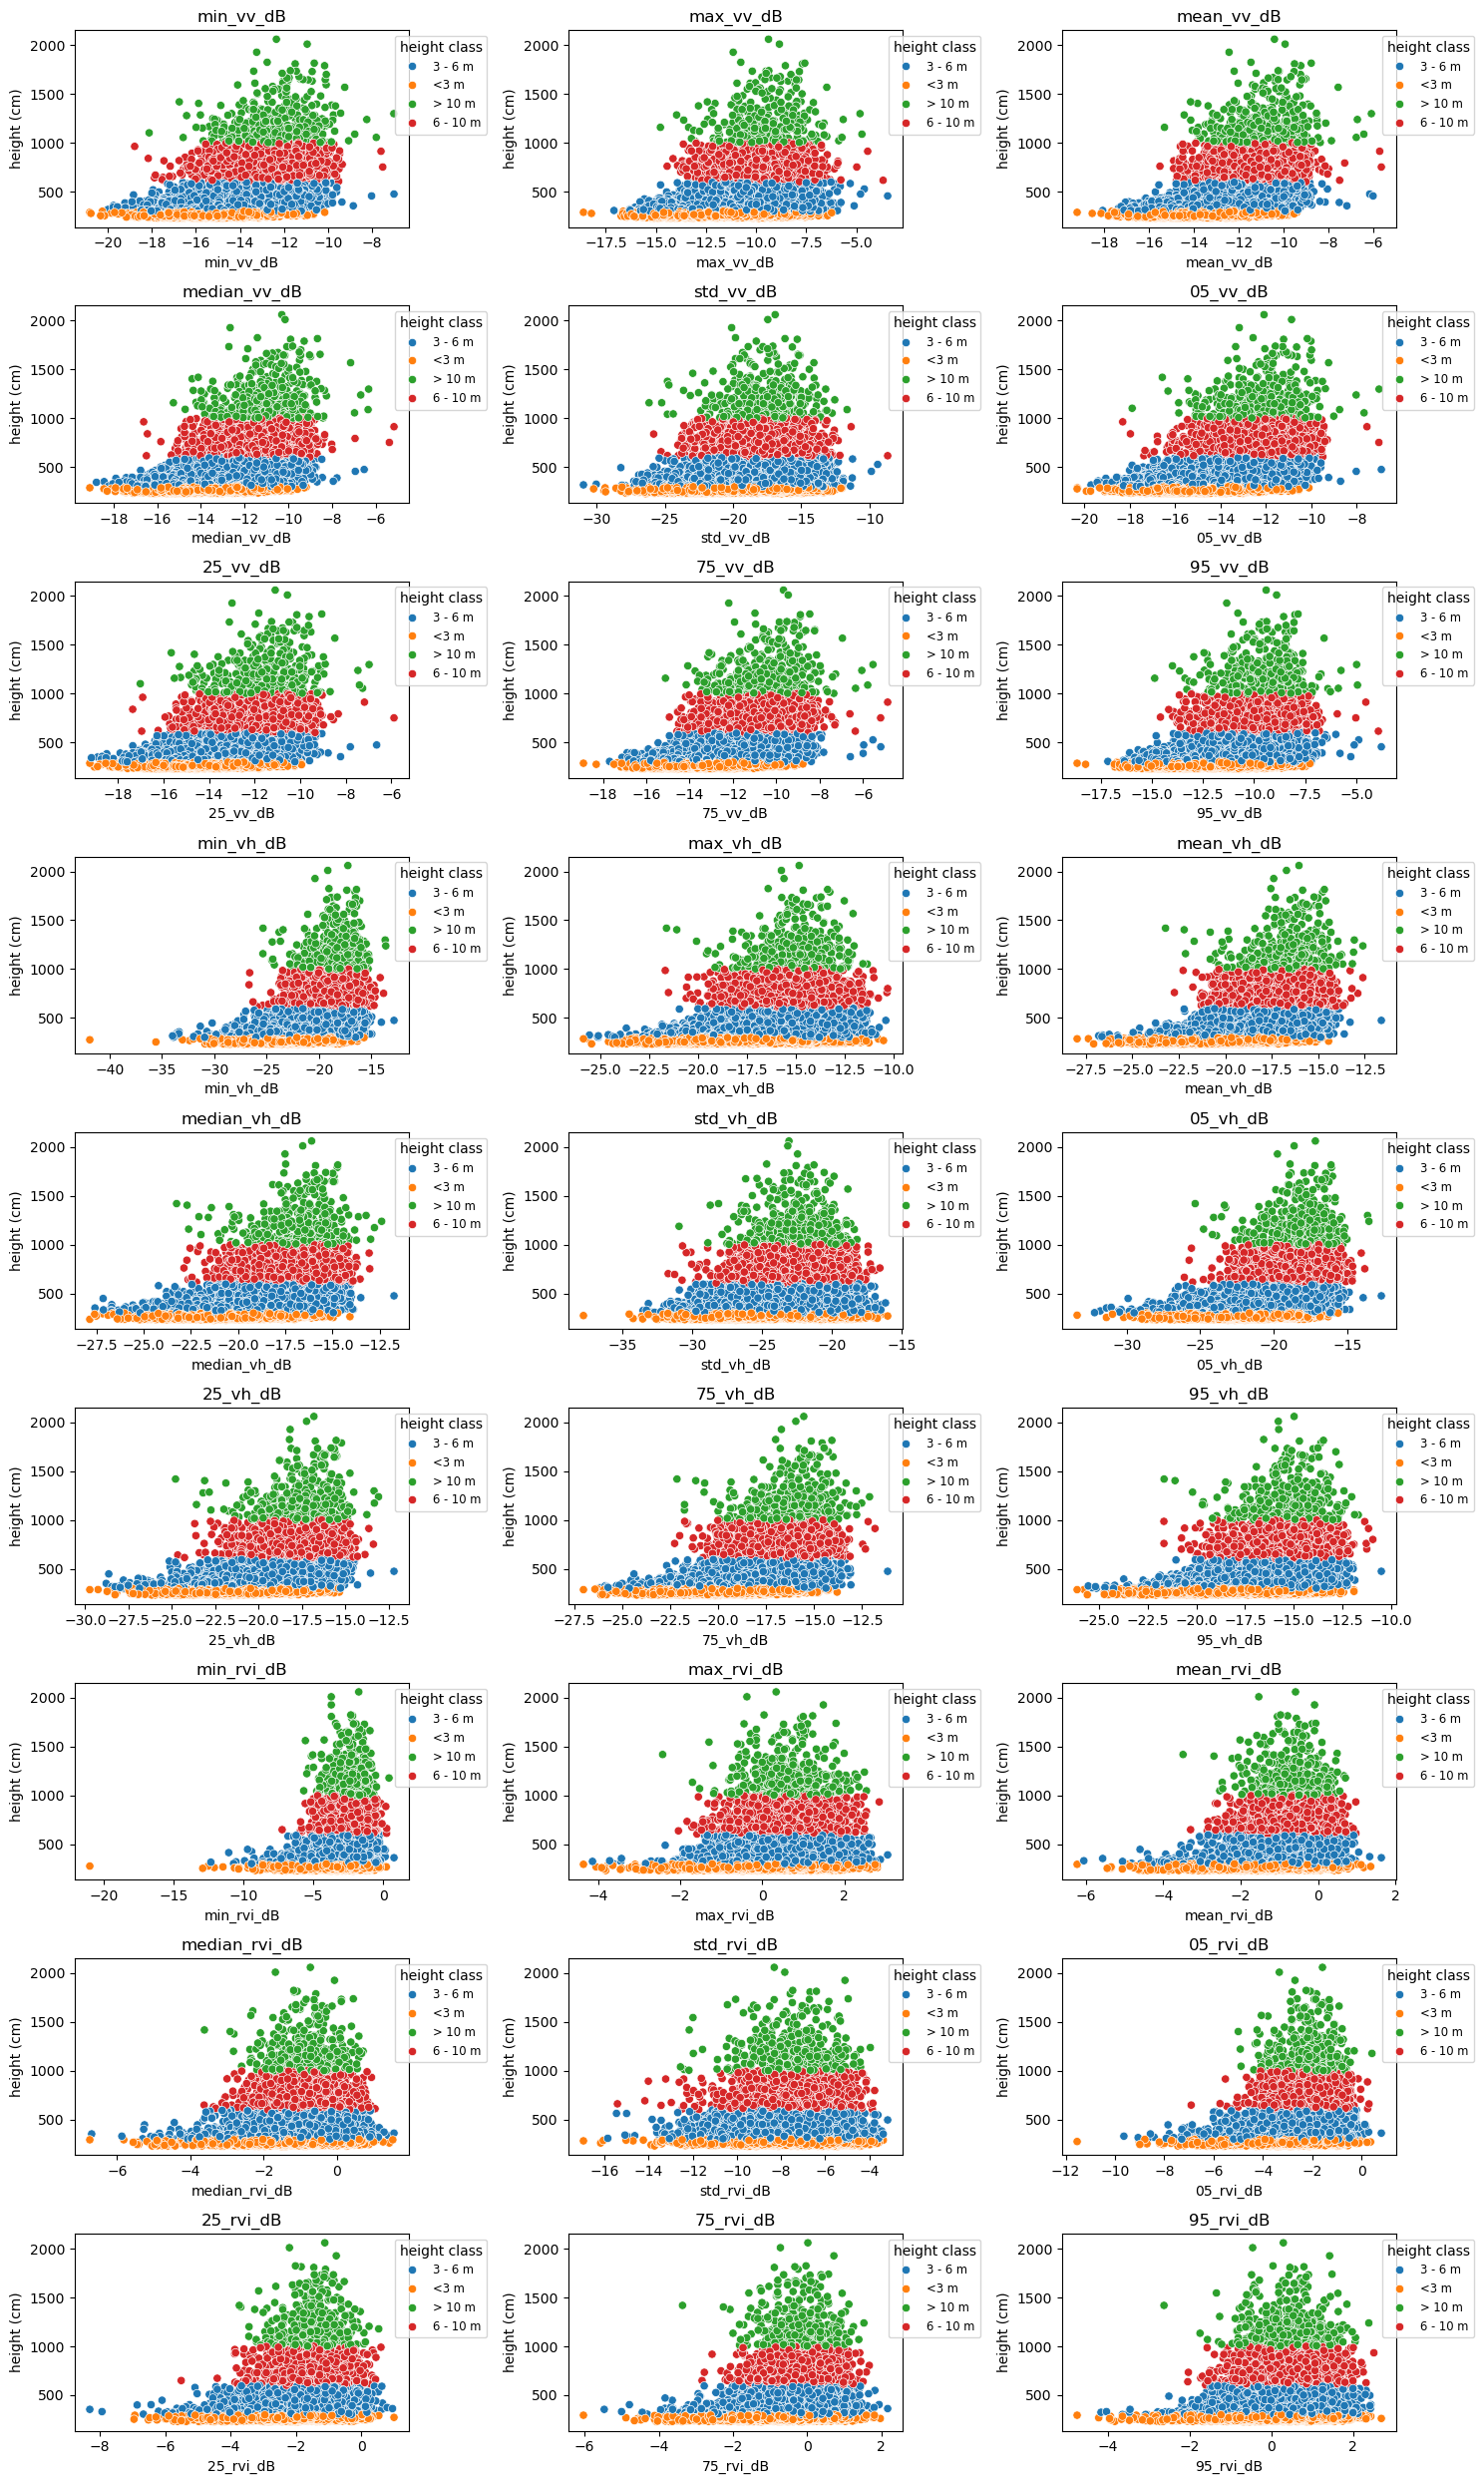

In [8]:
# Generate the subplot raster
rows = 9
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 25))

# Flatten 2-dimensional array to 1D for easier access
axes = axes.flatten()

# Plot all features
for i, feature in enumerate(df_dB.columns[3:]):
    sns.scatterplot(data=df_dB, x=feature, y='height (cm)', hue='Relative Height bin98 (cm)', ax=axes[i])
    axes[i].set_title(feature) 
    axes[i].legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='height class', fontsize='small')

# Adjust the layout, show and save plots
plt.tight_layout()
plt.savefig('scatterplots_dB.png')
plt.show()